## DATASET DESCRIPTION (Question 1.csv; About Question 1 Dataset.pdf) (The above datasets are stored in a zip folder called “Question 1”) This dataset is about global coffee quality, processing and sales as sourced from the CQI database in the year 2023.
### 1. What insights can you convey to a coffee exporter based on the dataset provided? 
### 2. Generate a model to predict the Total Cup Points of coffee and verify its suitability at making predictions. 
### 3. Categorize different types of coffee using a cluster analysis algorithm and evaluate them according to their coffee quality based on features which impact the variable Total Cup Points. 

#### TASK 1 - IMPORTING LIBRARIES

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.colors as mcolors
from dateutil import parser
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE
from scipy.stats import pearsonr, pointbiserialr
import warnings
warnings.filterwarnings("ignore")

Description

    Aroma: Refers to the scent or fragrance of the coffee.
    Flavor: The flavor of coffee is evaluated based on the taste, including any sweetness, bitterness, acidity, and other flavor notes.
    Aftertaste: Refers to the lingering taste that remains in the mouth after swallowing the coffee.
    Acidity: Acidity in coffee refers to the brightness or liveliness of the taste.
    Body: The body of coffee refers to the thickness or viscosity of the coffee in the mouth.
    Balance: Balance refers to how well the different flavor components of the coffee work together.
    Uniformity: Uniformity refers to the consistency of the coffee from cup to cup.
    Clean Cup: A clean cup refers to a coffee that is free of any off-flavors or defects, such as sourness, mustiness, or staleness.
    Sweetness: It can be described as caramel-like, fruity, or floral, and is a desirable quality in coffee.


### Reading the dataset

In [93]:
df = pd.read_csv("Question 1.csv")

In [94]:
df.head(2)

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"


DATA CLEANING

In [95]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 41)


checking on datatypes of the dataset

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

### checking for distinct values

In [97]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Unnamed: 0: 207 distinct values
ID: 207 distinct values
Country of Origin: 22 distinct values
Farm Name: 173 distinct values
Lot Number: 188 distinct values
Mill: 163 distinct values
ICO Number: 68 distinct values
Company: 72 distinct values
Altitude: 98 distinct values
Region: 121 distinct values
Producer: 173 distinct values
Number of Bags: 55 distinct values
Bag Weight: 39 distinct values
In-Country Partner: 21 distinct values
Harvest Year: 7 distinct values
Grading Date: 75 distinct values
Owner: 80 distinct values
Variety: 49 distinct values
Status: 1 distinct values
Processing Method: 11 distinct values
Aroma: 19 distinct values
Flavor: 19 distinct values
Aftertaste: 20 distinct values
Acidity: 19 distinct values
Body: 17 distinct values
Balance: 18 distinct values
Uniformity: 3 distinct values
Clean Cup: 1 distinct values
Sweetness: 1 distinct values
Overall: 21 distinct values
Defects: 1 distinct values
Total Cup Points: 81 distinct values
Moisture Percentage: 46 distinct value

### Missing Values 

In [98]:
#check missing ratio
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio
ICO Number,63.768116
Variety,2.898551
Processing Method,2.415459
Mill,1.449275
Farm Name,0.966184
Region,0.966184
Lot Number,0.483092
Altitude,0.483092
Producer,0.483092


In [99]:
#imputing missing values in numeric varaibles KnnImputer
from sklearn.impute import KNNImputer
for col in df.select_dtypes(include=['number']):
  imputer = KNNImputer(n_neighbors=5)
  df[col] = imputer.fit_transform(df[[col]])

#imputer missing values in object variable with mode
for col in df.select_dtypes(include=['object']):
  df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()

Unnamed: 0               0
ID                       0
Country of Origin        0
Farm Name                0
Lot Number               0
Mill                     0
ICO Number               0
Company                  0
Altitude                 0
Region                   0
Producer                 0
Number of Bags           0
Bag Weight               0
In-Country Partner       0
Harvest Year             0
Grading Date             0
Owner                    0
Variety                  0
Status                   0
Processing Method        0
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Uniformity               0
Clean Cup                0
Sweetness                0
Overall                  0
Defects                  0
Total Cup Points         0
Moisture Percentage      0
Category One Defects     0
Quakers                  0
Color                    0
Category Two Defects     0
E

### Completeness

In [100]:
# Mapping the Education
processing_mapping = {
    "Double Anaerobic Washed": "Washed / Wet",
    "Semi Washed": "Washed / Wet",
    "Honey,Mossto": "Pulped natural / honey",
    "Double Carbonic Maceration / Natural": "Natural / Dry",
    "Wet Hulling": "Washed / Wet",
    "Anaerobico 1000h": "Washed / Wet",
    "SEMI-LAVADO": "Natural / Dry"
}
# Fixing the values in the column
df['Processing Method'] = df['Processing Method'].map(processing_mapping)
df['Processing Method'].fillna("Washed / Wet", inplace=True)

In [101]:
# Manually impute specific values based on ID (Which we cant use function)
df.loc[df['ID'] == 99, 'Altitude'] = 5273  # Impute value for ID 99
df.loc[df['ID'] == 105, 'Altitude'] = 1800  # Impute value for ID 105
df.loc[df['ID'] == 180, 'Altitude'] = 1400  # Impute value for ID 180


# Define a function to clean and calculate the mean
def clean_altitude_range(range_value):
    if isinstance(range_value, str):
        range_value = range_value.replace(" ", "")  # Remove blank spaces
        if '-' in range_value:
            try:
                start, end = range_value.split('-')
                start = int(start)
                end = int(end)
                return (start + end) / 2
            except ValueError:
                return np.nan
        else:
            try:
                return int(range_value)
            except ValueError:
                return np.nan
    else:
        return range_value

# Apply the function to clean and calculate the mean for each value in the "Altitude" column
df['Altitude'] = df['Altitude'].apply(clean_altitude_range)

In [102]:
# Extract the prior year from the "Harvest Year" column
df['Harvest Year'] = df['Harvest Year'].str.split('/').str[0].str.strip()

In [103]:
# Convert "Harvest Year" and "Expiration" columns to datetime objects using dateutil parser
df['Harvest Year'] = pd.to_datetime(df['Harvest Year'], format='%Y')
df['Expiration'] = df['Expiration'].apply(parser.parse)

### Make new Features 

In [104]:
# Calculate the difference in days between "Expiration" and "Harvest Year" columns
df['Coffee Age'] = (df['Expiration'] - df['Harvest Year']).dt.days

# Exploratory Data Analysis 

## Univariative Analysis

In [105]:
# List of numeric attributes
numeric_attributes = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage','Coffee Age']

# Create a subplot for each numeric attribute
fig = make_subplots(rows=len(numeric_attributes), cols=1)

# Add a histogram to the subplot for each numeric attribute
for i, attribute in enumerate(numeric_attributes):
    fig.add_trace(go.Histogram(x=df[attribute], nbinsx=50, name=attribute), row=i+1, col=1)

fig.update_layout(height=200*len(numeric_attributes), width=800, title_text="Histograms of Numeric Attributes")
fig.show()

DATA VISUALIZATION

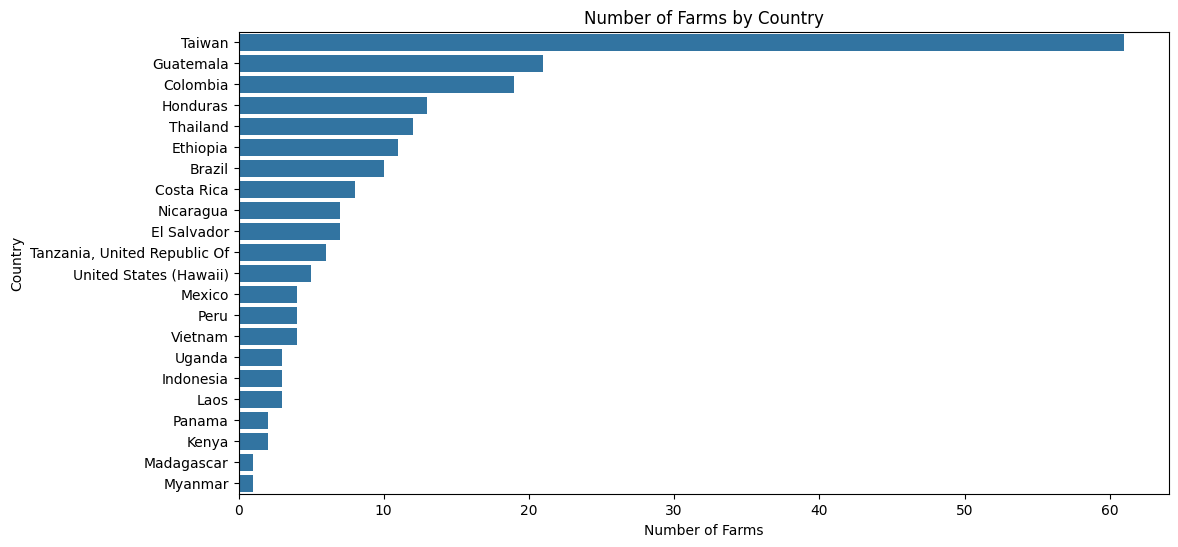

In [106]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Country of Origin', order=df['Country of Origin'].value_counts().index)
plt.xlabel('Number of Farms')
plt.ylabel('Country')
plt.title('Number of Farms by Country')
plt.show()

VIEWING THE TOP RATED COUNTRIES

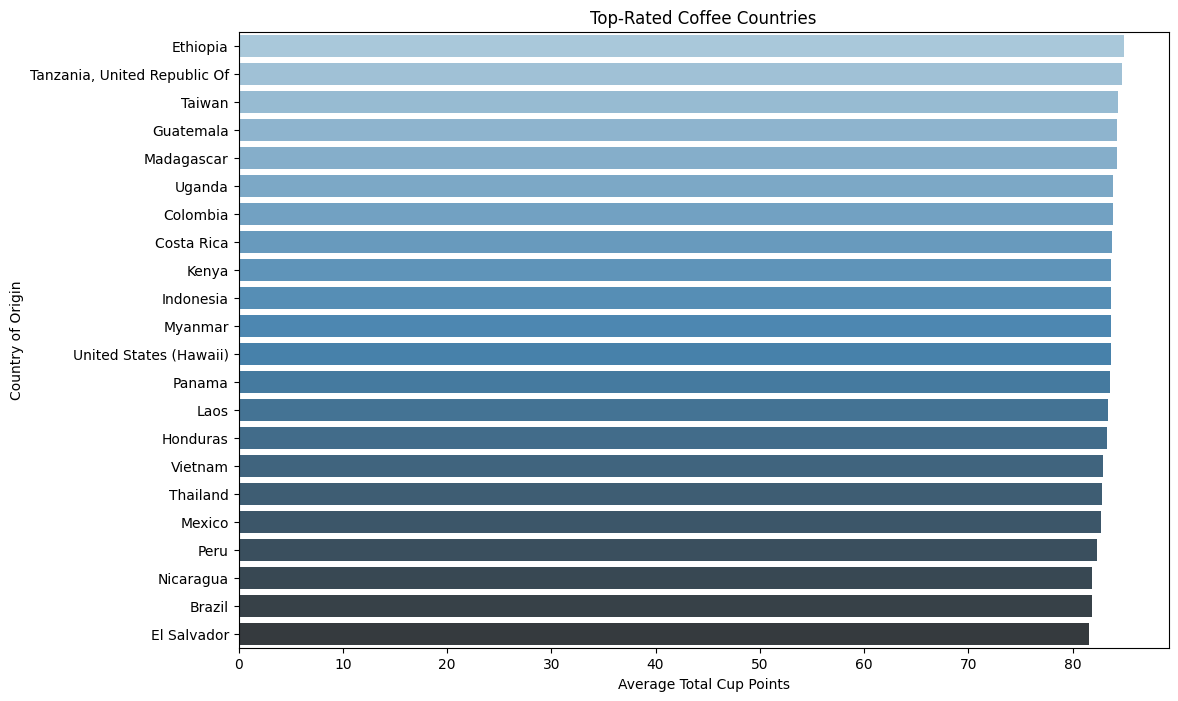

In [107]:
average_points = df.groupby('Country of Origin')['Total Cup Points'].mean().reset_index()
sorted_countries = average_points.sort_values('Total Cup Points', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_countries, x='Total Cup Points', y='Country of Origin', palette='Blues_d')
plt.xlabel('Average Total Cup Points')
plt.ylabel('Country of Origin')
plt.title('Top-Rated Coffee Countries')
plt.show()

In [108]:
average_points = df.groupby(['Country of Origin', 'Farm Name'])['Total Cup Points'].mean().reset_index()
sorted_farms = average_points.sort_values(['Country of Origin', 'Total Cup Points'], ascending=[True, False])
top_farms = sorted_farms.groupby('Country of Origin').first().reset_index()
fig = px.scatter(top_farms, x='Total Cup Points', y='Country of Origin', text='Farm Name',
                 title='Top Farms in Each Country', color='Total Cup Points',
                 labels={'Total Cup Points': 'Average Total Cup Points'})
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_title='Average Total Cup Points')
fig.show()

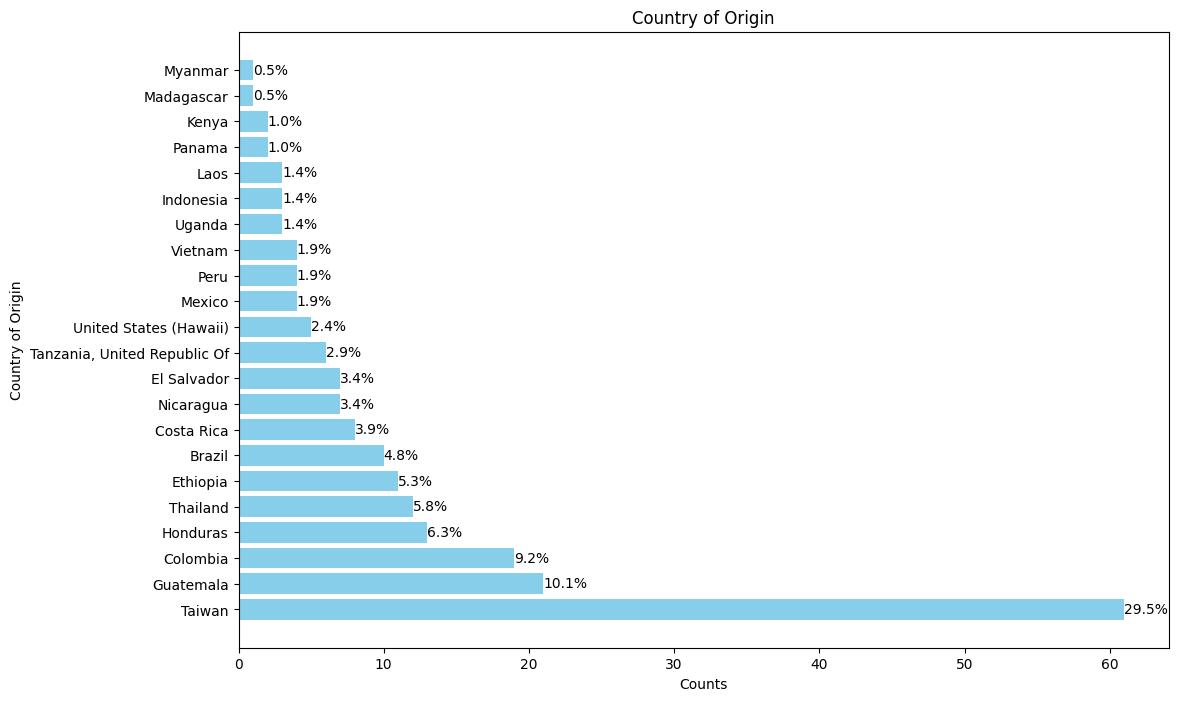

In [109]:
# count values originating frome each country
highest_coffee_producer = df['Country of Origin'].value_counts()

# barplot
fig, ax = plt.subplots(figsize=(12,8))
bars = ax.barh(highest_coffee_producer.index, highest_coffee_producer, color='skyblue')

# Calculate and display the percentage for each bar
total_counts = highest_coffee_producer.sum()
for bar in bars:
    width = bar.get_width()
    percentage = (width / total_counts) * 100
    ax.text(width, bar.get_y() + bar.get_height() / 2,
            f'{percentage:.1f}%', va='center', ha='left', fontsize=10, color='black')

plt.title('Country of Origin')
plt.xlabel('Counts')
plt.ylabel('Country of Origin')
plt.show()

In [110]:
producer_counts = df['Producer'].value_counts().reset_index()
producer_counts.columns = ['Producer', 'Farm Count']
sorted_producers = producer_counts.sort_values('Farm Count', ascending=False)
top_producers = sorted_producers.head(20)
fig = px.bar(top_producers, x='Producer', y='Farm Count',
             title='Top Producers', labels={'Farm Count': 'Number of Farms'})

fig.show()

fig = px.sunburst(top_producers, path=['Producer'], values='Farm Count',
                  title='Top Producers')

fig.show()

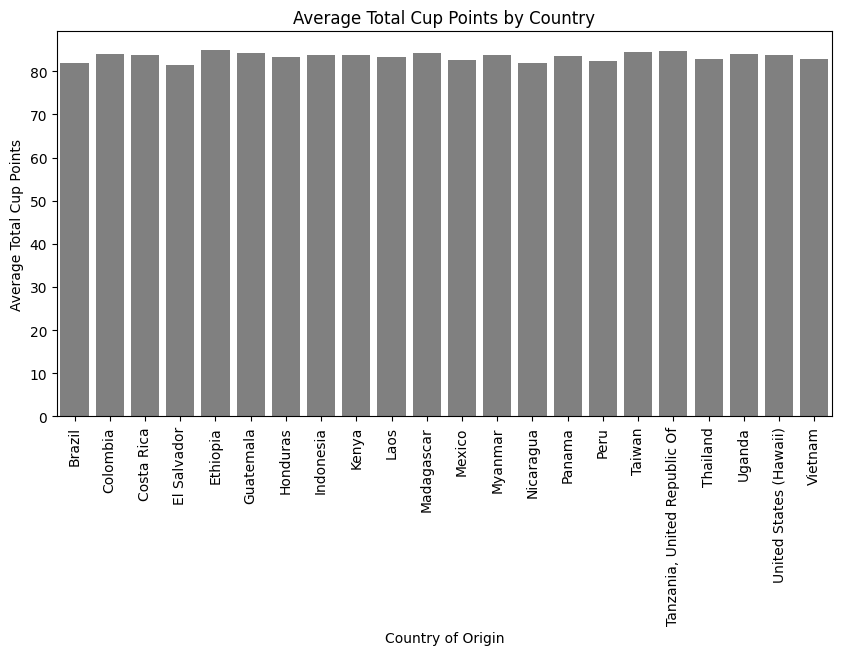

In [111]:
# Group the data by country and calculate the mean of Total Cup Points
df_grouped = df.groupby('Country of Origin')['Total Cup Points'].mean().reset_index()

# Create a Choropleth map
fig = px.choropleth(df_grouped, 
                    locations='Country of Origin', 
                    locationmode='country names',
                    color='Total Cup Points',
                    hover_name='Country of Origin',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average Total Cup Points by Country')

fig.show()

# Create a bar plot with gray color
plt.figure(figsize=(10, 5))
sns.barplot(x=df_grouped['Country of Origin'], y=df_grouped['Total Cup Points'], color='gray')
plt.title('Average Total Cup Points by Country')
plt.xlabel('Country of Origin')
plt.ylabel('Average Total Cup Points')
plt.xticks(rotation=90)
plt.show()

In [112]:
# Popular coffee processing methods per country
fig = px.scatter(df, x="Processing Method", y="Country of Origin",
                 color="Processing Method", title="Processing method of countries", height=700)
fig.update_traces(marker_size=8)

fig.show()

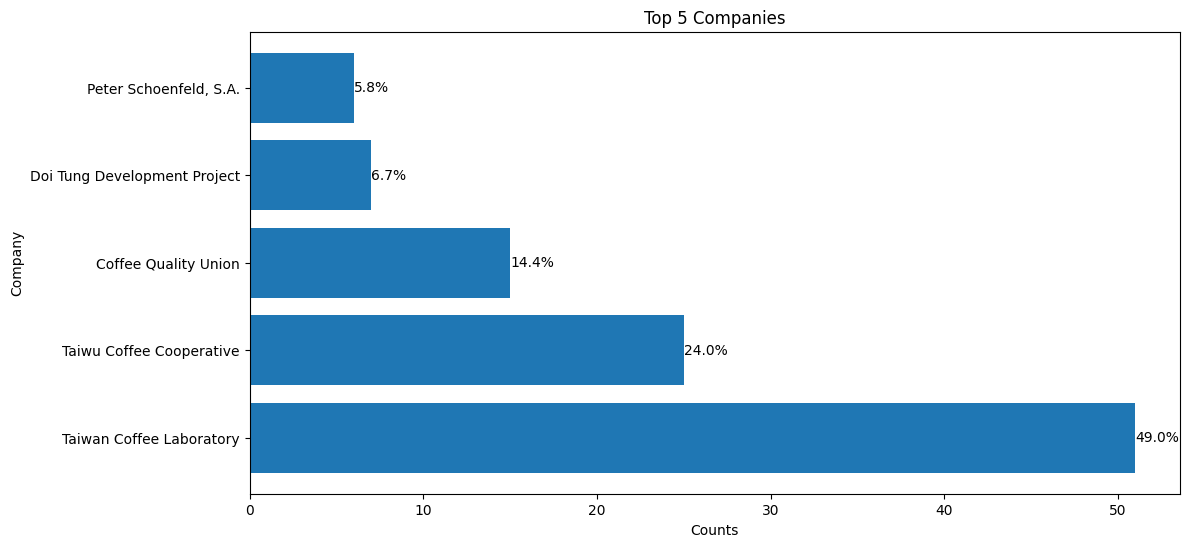

In [113]:
# Top 5 companies producing the most coffee
top_5_companies = df['Company'].value_counts().head(5)

# barplot
fig, ax = plt.subplots(figsize=(12,6))
# Use top_5_companies.values for the bar heights
bars = ax.barh(top_5_companies.index, top_5_companies.values)

# Calculate and display the percentage for each bar
total_counts = top_5_companies.sum()
for bar in bars:
    width = bar.get_width()
    percentage = (width / total_counts) * 100
    ax.text(width, bar.get_y() + bar.get_height() / 2,
            f'{percentage:.1f}%', va='center', ha='left', fontsize=10, color='black')

plt.title('Top 5 Companies')
plt.xlabel('Counts')
plt.ylabel('Company')
plt.show()

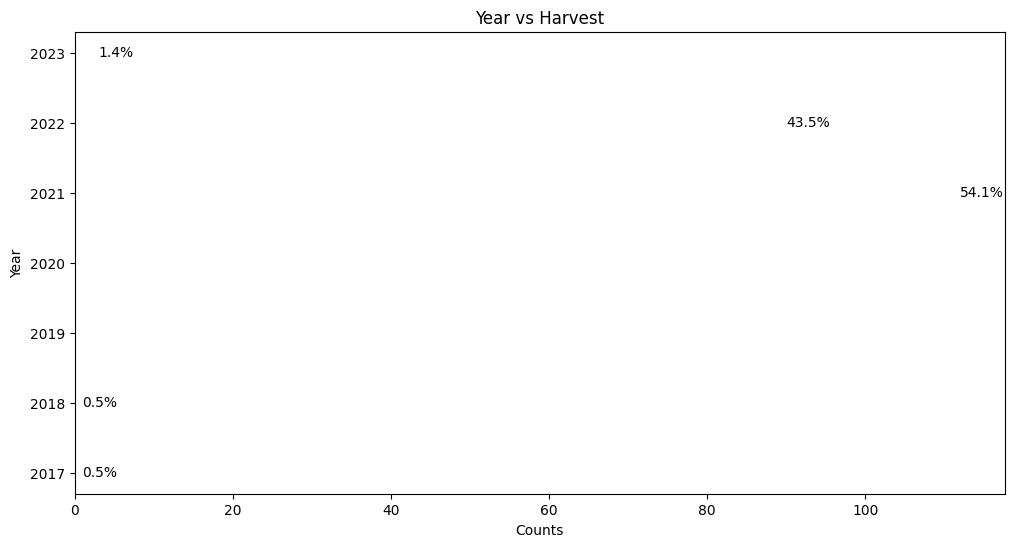

In [114]:
# plot Year with most harvest
most_harvest = df['Harvest Year'].value_counts()

# barplot
fig, ax = plt.subplots(figsize=(12,6))
# Use top_5_companies.values for the bar heights
bars = ax.barh(most_harvest.index, most_harvest.values)

# Calculate and display the percentage for each bar
total_counts = most_harvest.sum()
for bar in bars:
    width = bar.get_width()
    percentage = (width / total_counts) * 100
    ax.text(width, bar.get_y() + bar.get_height() / 2,
            f'{percentage:.1f}%', va='center', ha='left', fontsize=10, color='black')

plt.title('Year vs Harvest')
plt.xlabel('Counts')
plt.ylabel('Year')
plt.show()

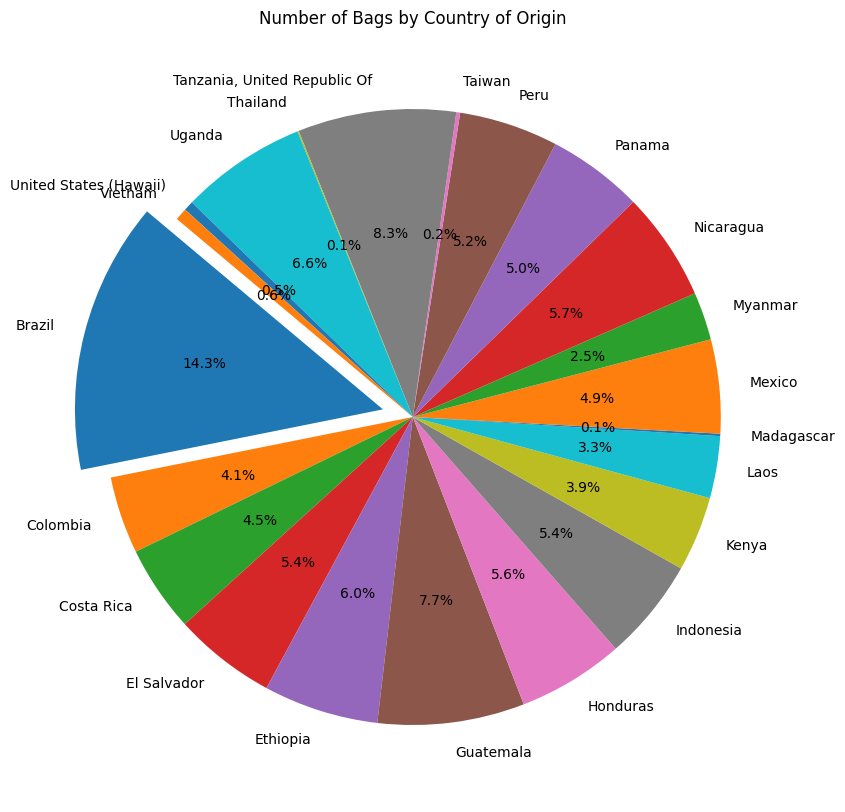

In [115]:
# Average Number of Bags by Country of Origin with Pie Chart
average_bags_per_origin = df.groupby('Country of Origin')['Number of Bags'].mean().reset_index()

# Pie Chart
sizes = average_bags_per_origin['Number of Bags']
labels = average_bags_per_origin['Country of Origin']
explode = [0.1 if i == 0 else 0 for i in range(len(sizes))]

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Number of Bags by Country of Origin')

plt.show()

# CORRELATION 

## Dealing with categorical and numerical column
    
### Select Columns

In [116]:
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])


In [117]:
# Separate categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Display the results
print("These are the categorical variables in the entire dataset:")
print(categorical_columns.tolist())

print("\nThese are the numerical variables in the dataset:")
print(numerical_columns.tolist())

These are the categorical variables in the entire dataset:
['Country of Origin', 'Farm Name', 'Lot Number', 'Mill', 'ICO Number', 'Company', 'Region', 'Producer', 'Bag Weight', 'In-Country Partner', 'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method', 'Color', 'Certification Body', 'Certification Address', 'Certification Contact']

These are the numerical variables in the dataset:
['ID', 'Altitude', 'Number of Bags', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects', 'Total Cup Points', 'Moisture Percentage', 'Category One Defects', 'Quakers', 'Category Two Defects', 'Coffee Age']


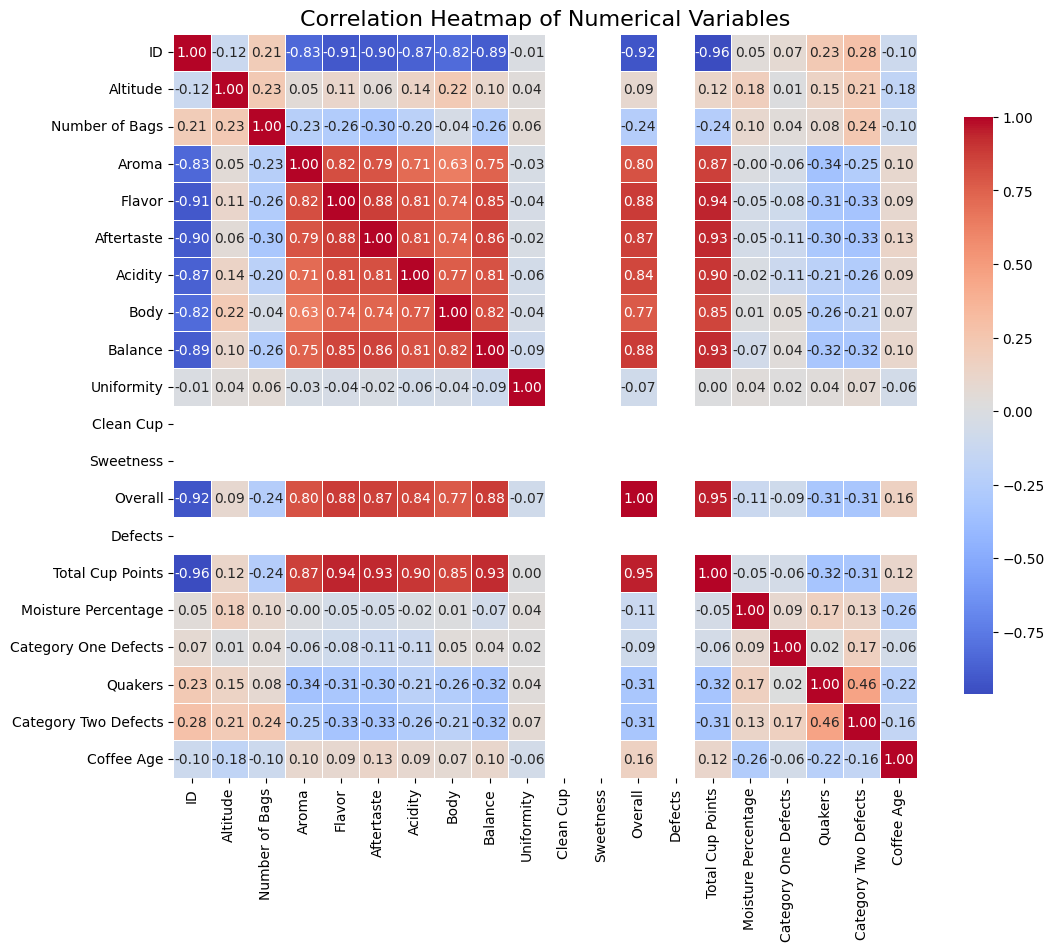

In [118]:
# Extract numerical columns
numerical_columns = ['ID', 'Altitude', 'Number of Bags', 'Aroma', 'Flavor', 'Aftertaste', 
                     'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 
                     'Overall', 'Defects', 'Total Cup Points', 'Moisture Percentage', 
                     'Category One Defects', 'Quakers', 'Category Two Defects', 'Coffee Age']

# Create a correlation matrix
corr_matrix = df[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap without white spaces
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .75}, linewidths=.5)

# Set the title
plt.title('Correlation Heatmap of Numerical Variables', size=16)

# Display the heatmap
plt.show()

In [119]:
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['ID'])

In [120]:
from scipy.stats import pearsonr, pointbiserialr
# df is my DataFrame
target_variable = 'Total Cup Points'
correlation_threshold = 0.5  # Set your desired threshold for "strong" correlation

# Store the correlations
correlations = {}

# Handling numerical variables
numerical_columns = df.select_dtypes(include=['number']).columns
for column in numerical_columns:
    if column != target_variable:
        corr, _ = pearsonr(df[column], df[target_variable])
        correlations[column] = corr

# Handling categorical variables
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    if df[column].nunique() == 2:
        # Binary categorical variables (Point-Biserial correlation)
        encoded_col = pd.get_dummies(df[column], drop_first=True)
        corr, _ = pointbiserialr(encoded_col, df[target_variable])
        correlations[column] = corr
    else:
        # Multi-level categorical variables (One-hot encoding + Pearson correlation)
        encoded_col = pd.get_dummies(df[column])
        for sub_col in encoded_col.columns:
            corr, _ = pearsonr(encoded_col[sub_col], df[target_variable])
            correlations[f"{column}_{sub_col}"] = corr

# Filter correlations based on the threshold
strong_correlations = {k: v for k, v in correlations.items() if abs(v) >= correlation_threshold}

# Sort correlations by absolute value for better readability
sorted_strong_correlations = {k: v for k, v in sorted(strong_correlations.items(), key=lambda item: abs(item[1]), reverse=True)}

# Display only strong correlations
print("Variables with strong correlation with 'Total Cup Points':")
for variable, correlation in sorted_strong_correlations.items():
    print(f"{variable}: {correlation:.4f}")


Variables with strong correlation with 'Total Cup Points':
Overall: 0.9472
Flavor: 0.9391
Aftertaste: 0.9348
Balance: 0.9295
Acidity: 0.8971
Aroma: 0.8689
Body: 0.8472


**Intepret the Result:**

1. Overall, `Flavor`, `Aftertaste`, `Balance`, `Acidity`, `Aroma`, `Body`: These variables have strong positive correlations with 'Total Cup Points'. This means that as these variables increase, the 'Total Cup Points' also tend to increase. For example, a higher `'Overall'` rating or 'Flavor' rating is associated with a higher 'Total Cup Points' score.


#  PREDICTIVE ANALYSIS

In [123]:
df.head(3)

,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,...,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact,Coffee Age
0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,non,Coffee Quality Union,1815.0,"Piendamo,Cauca",Diego Samuel Bermudez,1.0,...,11.8,0.0,0.0,green,3.0,2023-09-21,Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,993
1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,non,Taiwan Coffee Laboratory,1200.0,Chiayi,曾福森,1.0,...,10.5,0.0,0.0,blue-green,0.0,2023-11-15,Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",1048
2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,non,Taiwan Coffee Laboratory,1300.0,Laos Borofen Plateau,WU TAO CHI,19.0,...,10.4,0.0,0.0,yellowish,2.0,2023-11-15,Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",1048


### TASK 2: Generate a model to predict the Total Cup Points of coffee and verify its suitability at making predictions.

In [124]:
# List of selected features
features = ['Overall', 'Flavor', 'Aftertaste', 'Balance', 'Acidity', 'Aroma', 'Body']

# Check the data types of the selected features
variable_types = df[features].dtypes

# Categorize variables as numerical or categorical
categorical_vars = variable_types[variable_types == 'object'].index.tolist()
numerical_vars = variable_types[variable_types != 'object'].index.tolist()

# Display the results
print("Categorical Variables:")
print(categorical_vars)

print("\nNumerical Variables:")
print(numerical_vars)


Categorical Variables:
[]

Numerical Variables:
['Overall', 'Flavor', 'Aftertaste', 'Balance', 'Acidity', 'Aroma', 'Body']


Since there no categorical variables in the final selected variables, no encoding is required

DEFINING X AND Y VARIABLES

In [125]:
# Define the features (X) and target (y)
features = ['Overall', 'Flavor', 'Aftertaste', 'Balance', 'Acidity', 'Aroma', 'Body']
X = df[features]
y = df['Total Cup Points']

In [126]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [129]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [130]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [131]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [137]:
# Display the evaluation metrics
print(f"Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Model Evaluation:
Mean Absolute Error (MAE): 0.03
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.05
R-squared (R2): 1.00


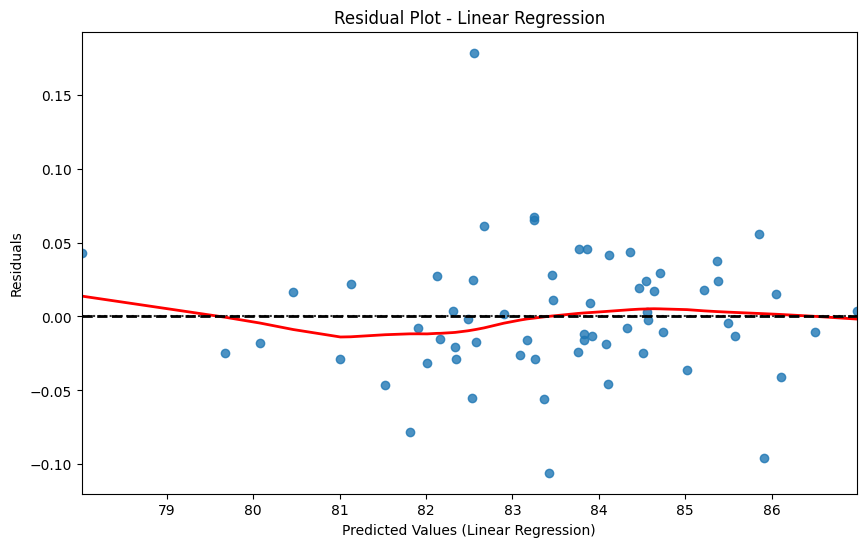

In [138]:
# Calculate residuals for the Linear Regression model
residuals_lr = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals_lr, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted Values (Linear Regression)')
plt.ylabel('Residuals')
plt.title('Residual Plot - Linear Regression')
plt.axhline(0, color='black', linestyle='--', lw=2)
plt.show()


### Overall Assessment: Based on this residual plot, the linear regression model seems to be a reasonable fit for the data. The residuals show no clear patterns or trends, suggesting that the model is capturing the underlying relationship between the variables adequately.

Results are too good, but i suspect over fitting, i decide to try with another model

In [139]:
# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [140]:
# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

In [141]:
# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [142]:
# Display the evaluation metrics
print(f"Random Forest Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

Random Forest Model Evaluation:
Mean Absolute Error (MAE): 0.18
Mean Squared Error (MSE): 0.09
Root Mean Squared Error (RMSE): 0.30
R-squared (R2): 0.97


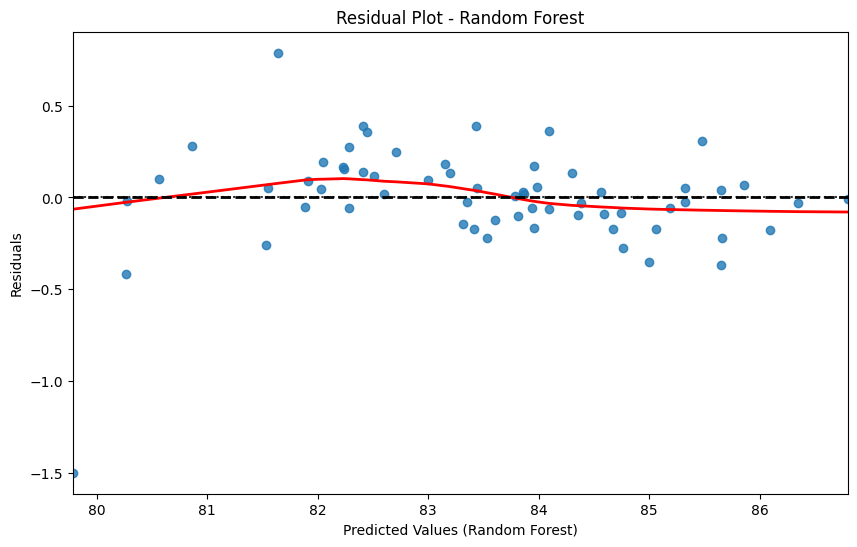

In [143]:
# Calculate residuals for the Random Forest model
residuals_rf = y_test - y_pred_rf

# Plot residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_rf, y=residuals_rf, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted Values (Random Forest)')
plt.ylabel('Residuals')
plt.title('Residual Plot - Random Forest')
plt.axhline(0, color='black', linestyle='--', lw=2)
plt.show()


### Implications: Based on these observations, the random forest model appears to be performing well in terms of capturing the relationship between the predictors and the target variable. The residuals suggest that the model's assumptions are generally met.

## TASK 3:
### Categorize different types of coffee using a cluster analysis algorithm and evaluate them according to their coffee quality based on features which impact the variable Total Cup Points

In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [145]:
features = ['Overall', 'Flavor', 'Aftertaste', 'Balance', 'Acidity', 'Aroma', 'Body']
X = df[features]

In [146]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [147]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

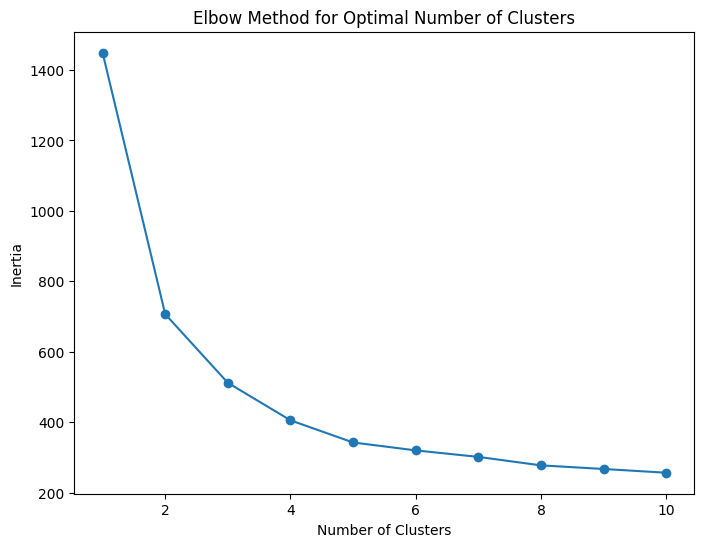

In [148]:
# Plot Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [149]:
# Based on the Elbow Method, choose the optimal number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Calculate the mean values for each cluster
cluster_summary = df.groupby('Cluster')[features + ['Total Cup Points']].mean()

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.32


In [151]:
# Display cluster summary
print("\nCluster Summary:")
cluster_summary


Cluster Summary:


,Overall,Flavor,Aftertaste,Balance,Acidity,Aroma,Body,Total Cup Points
Cluster,,,,,,,,
0,7.705455,7.772323,7.607576,7.666162,7.717980,7.729798,7.66404,83.841919
1,7.329310,7.424138,7.302069,7.355345,7.397069,7.431379,7.39500,81.632069
2,8.023200,8.062000,7.929600,7.935200,7.975600,8.039800,7.88040,85.845000


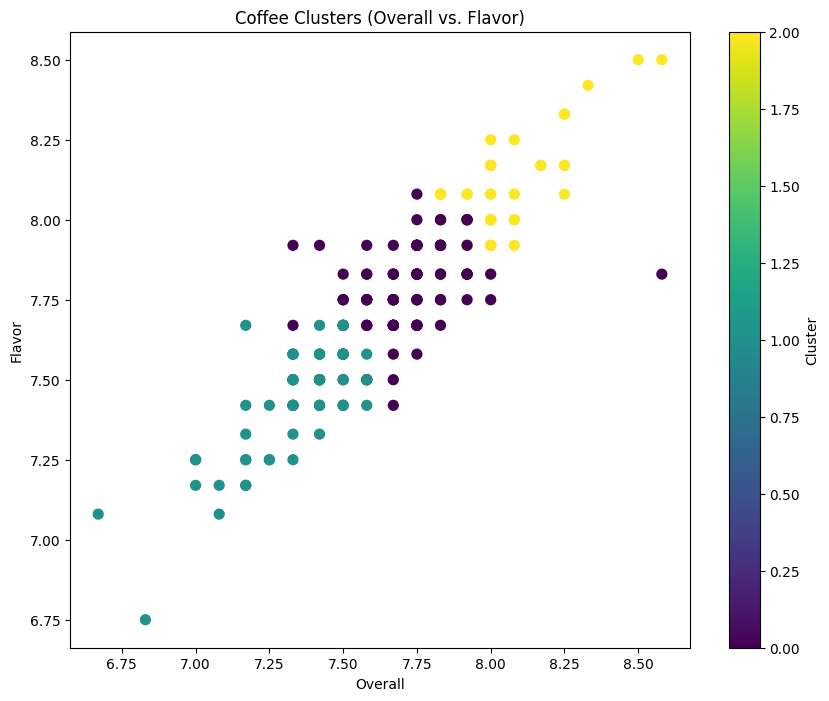

In [152]:
# Optional: Plotting clusters (if 2D or 3D visualization is needed)
plt.figure(figsize=(10, 8))
plt.scatter(df['Overall'], df['Flavor'], c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Overall')
plt.ylabel('Flavor')
plt.title('Coffee Clusters (Overall vs. Flavor)')
plt.colorbar(label='Cluster')
plt.show()